In [1]:
%matplotlib inline  
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

# Read in data

In [2]:
df = pd.read_csv('gene_expression.csv')

In [3]:
df = df.drop(df.columns[0], 1)

In [4]:
df.head()

,azc81,bdb223,bsj154,bwr202,drs203,eno150,hgo132,jem139,mbd135,nby169,nfb200,npo218,ofz208,qmj73,rgm35,rva241,wdb83,yfm28
0,0.548211,0.120231,0.055537,0.110432,0.960696,0.759469,0.874050,0.807593,0.663830,0.428409,0.912917,0.940543,0.744947,0.261574,0.783734,0.934044,0.000000,0.737642
1,0.111383,0.353474,0.051218,0.003683,0.939109,0.872921,0.900342,0.886981,0.680817,0.722386,0.793601,0.848213,0.779071,0.243231,0.338945,0.912718,0.000000,0.926540
2,0.459971,0.594186,1.000000,0.946645,0.399635,0.359502,0.342766,0.335695,0.544554,0.689002,0.364604,0.946927,0.886632,0.815887,0.555462,0.405912,0.700435,0.396066
3,0.099305,0.378251,0.591589,0.619087,0.901629,0.984772,0.802375,1.000000,0.270841,0.298178,0.434799,0.395561,0.077296,0.248131,0.274456,0.885201,0.476311,0.932371
4,0.460037,0.387290,0.829306,0.955035,0.464486,0.745253,0.637082,0.816490,0.955152,0.086996,0.751228,0.104130,0.473013,0.645816,0.123011,0.467099,1.000000,0.888156


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114dd0a90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12175a7b8>]], dtype=object)

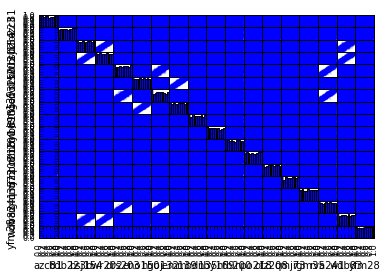

In [5]:
pd.plotting.scatter_matrix(df, alpha = .2)

In [6]:
df.shape

(3000, 18)

# Perform PCA

In [7]:
from sklearn.preprocessing import scale
col_names = df.columns
df = pd.DataFrame(scale(df), columns = col_names)

In [8]:
pca = PCA(n_components=10)
pca.fit(df)

PCA(copy=True, n_components=10, whiten=False)

# Consider how many components are valuable

In [9]:
pca.explained_variance_ratio_

array([ 0.1607032 ,  0.15885145,  0.10782797,  0.06039583,  0.05962489,
        0.05795824,  0.05711221,  0.05602908,  0.05447766,  0.0535871 ])

In [10]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.1607032 ,  0.31955465,  0.42738263,  0.48777845,  0.54740334,
        0.60536158,  0.66247379,  0.71850287,  0.77298054,  0.82656764])

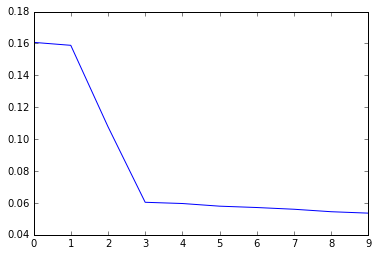

In [11]:
plt.plot(pca.explained_variance_ratio_)

In [12]:
pca = PCA(n_components=3)
pca.fit(df)
df_reduced = pca.transform(df)

In [13]:
df_reduced

array([[-1.23178075, -3.49215122, -1.12300127],
       [-1.05401461, -3.66200011, -1.55882541],
       [-0.27325188,  2.36254956,  0.82719389],
       ..., 
       [ 1.26115605,  3.46339207,  1.29493142],
       [ 2.80497329,  0.16630311,  1.19670872],
       [ 1.68347098, -1.68827638,  0.58918203]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125da2898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x126eda630>]], dtype=object)

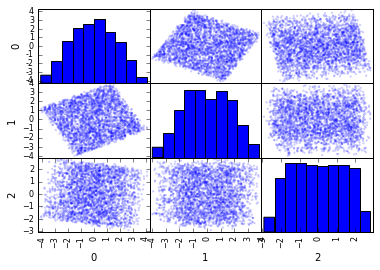

In [14]:
df_reduced = pd.DataFrame(df_reduced)
pd.plotting.scatter_matrix(df_reduced, alpha = .2)

# Some info from PCA return

In [15]:
pca.components_.shape

(3, 18)

In [16]:
pca.components_[0]

array([-0.02344378,  0.01568261, -0.26681514, -0.2678084 , -0.50353945,
       -0.08880852, -0.50386818, -0.09213612,  0.01566269,  0.03748508,
       -0.00239135, -0.00395659,  0.01896597,  0.02721848, -0.01116169,
       -0.51270673, -0.2582771 , -0.00307298])

In [17]:
np.argmax(np.abs(pca.components_[0]))

15

In [22]:
pca.components_[0][15]

-0.51270672737526646

In [23]:
df.columns[15]

'rva241'

In [24]:
np.argmax(np.abs(pca.components_[1]))

3

In [25]:
df.columns[3]

'bwr202'